In [1]:
!pip install xpress
!pip install pandas

In [14]:
import xpress as xp
import pandas as pd

**Loading data**

In [15]:
meal_data_path = 'C:/AOR/meal_data.xlsx'
meal_data = pd.read_excel(meal_data_path)
meal_data.head()

,item_name,course_type,subcategories,meal_type,cost,nf_calories,nf_calories_from_fat,nf_total_fat,nf_saturated_fat,nf_trans_fatty_acid,...,nf_vitamin_a_dv,nf_vitamin_c_dv,nf_calcium_dv,nf_iron_dv,nf_potassium,nf_servings_per_container,nf_serving_size_qty,nf_serving_size_unit,nf_serving_weight_grams,images_front_full_url
0,Trick OR Treat Ice Cream,Soup,cream,NaN,2.08,300.00,140.0,16.0,9.0,0.0,...,8.0,2.0,15.0,4.0,NaN,NaN,4.00,oz scoops,NaN,NaN
1,Sweet Fries Snack,Side,fried,NaN,2.27,1150.00,690.0,79.0,7.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,13.40,oz,NaN,NaN
2,Tomatoes - Salad,Side,red orange,NaN,3.45,9.58,2.4,0.0,0.0,0.0,...,5.0,14.0,0.0,0.0,NaN,NaN,45.52,Grams,45.52,NaN
3,Chicken BBQ Caesar Salad EntrÌ©e,Main dish,poultry,NaN,3.95,203.00,NaN,NaN,2.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.00,servings,NaN,NaN
4,Corn and Black Bean Salad,Side,legume,NaN,3.59,140.00,10.0,1.0,0.0,0.0,...,2.0,4.0,2.0,10.0,NaN,NaN,1.00,Salad,NaN,NaN


In [16]:
score_preference_path = 'C:/AOR/customer_dish_preferences.xlsx'
score_preference = pd.read_excel(score_preference_path)
score_preference.set_index('Unnamed: 0', inplace=True)
score_preference.head()

,Trick OR Treat Ice Cream,Sweet Fries Snack,Tomatoes - Salad,Chicken BBQ Caesar Salad EntrÌ©e,Corn and Black Bean Salad,Mango Cake,Egg,"Flavored Fresh Lemonade, Peach",Add Pirate Tossed Salad,Blueberry Vinaigrette,...,Vegetable Stir-Fry,Vegetable Lasagna,Vegetable Paella,Vegetable Quiche,Vegetable Kebabs,Vegetable Chili,Stuffed Bell Peppers,Vegetable Moussaka,Vegetable Biryani,Vegetable Enchiladas
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Customer_1,3,1,1,3,1,2,3,3,1,3,...,3,2,1,3,3,1,3,3,3,1
Customer_2,1,3,3,1,1,3,3,1,3,3,...,2,3,2,3,3,3,3,3,2,3
Customer_3,2,2,1,3,3,3,1,3,3,1,...,3,1,3,3,3,3,3,3,3,3
Customer_4,2,2,1,2,3,2,2,1,3,1,...,3,3,3,2,2,2,2,1,3,3
Customer_5,3,3,3,3,2,2,2,3,3,3,...,2,3,2,3,3,3,2,3,3,2


In [17]:
nutrition_criteria_path = "C:/AOR/nutrition_criteria.xlsx"
nutrition_criteria = pd.read_excel(nutrition_criteria_path)
nutrition_criteria.head()


,ID,Element,F,M,Average
0,1,Calories,1600,2000,1800
1,2,Sodium,2300,2300,2300
2,3,Carbohydrate,130,130,130
3,4,Dietary_fiber,22,28,25
4,5,Protein,46,56,51


In [18]:
table3_path = "C:/AOR/table3.xlsx"
meal_constraints = pd.read_excel(table3_path, sheet_name='meal_constraints', index_col=0)
diet_types = pd.read_excel(table3_path, sheet_name='diet_types', index_col=0)
maximum_servings = pd.read_excel(table3_path, sheet_name='maximum_servings')
day_item = pd.read_excel(table3_path, sheet_name='day_item')
wp = pd.read_excel(table3_path, sheet_name='wp')
wc = pd.read_excel(table3_path, sheet_name='wc')
day_item.head()


,Breakfast,Soup,Salad,Main dish,Side,Appetizer,Dessert
0,1,1,1,1,NaN,NaN,1


**Model parameters and decision variables**

In [19]:
# model = xp.problem()
num_item = 210
num_day = 7
num_meal = 3
num_patron = 3
num_course = 7

I = list(range(num_item)) # i∈I
M = ['breakfast', 'lunch', 'dinner'] # j∈M
T = list(range(num_day)) # t∈T
P = list(range(num_patron)) # p∈P
L = ['Breakfast', 'Soup', 'Salad', 'Main dish', 'Side', 'Appetizer', 'Dessert'] # l∈L
K = ['calories','cholesterol','sodium','dietary_fiber']
#K = ['calories','cholesterol','dietary_fiber']


l_i = {meal_data.index[i]: meal_data.iloc[i]["course_type"] for i in range(len(meal_data))}
I_l = meal_data.groupby("course_type").apply(lambda x: list(x.index)).to_dict()
S_l = meal_data.groupby("course_type")["subcategories"].unique().apply(list).to_dict()
I_ls = meal_data.groupby(["course_type", "subcategories"]).apply(lambda x: list(x.index)).to_dict()

w = {
    "calories": {i: meal_data.iloc[i]["nf_calories"] for i in I},
    "cholesterol": {i: meal_data.iloc[i]["nf_cholesterol"] for i in I},
    "sodium": {i: meal_data.iloc[i]["nf_sodium"] for i in I},
    "dietary_fiber": {i: meal_data.iloc[i]["nf_dietary_fiber"] for i in I},
}
# w = {
#     "calories": {i: meal_data.iloc[i]["nf_calories"] for i in I},
#     "cholesterol": {i: meal_data.iloc[i]["nf_cholesterol"] for i in I},
#     "dietary_fiber": {i: meal_data.iloc[i]["nf_dietary_fiber"] for i in I},
# }


ns = meal_constraints.to_dict(orient='index')
np = diet_types.to_dict(orient='index')
np_expanded = {p: {j: {l: np[j][l] for l in L} for j in M} for p in P}
nsOWP = maximum_servings.to_dict(orient='records')[0]
nsd = day_item.to_dict(orient='records')[0]
wp_l = wp.to_dict(orient='records')[0]
wc_l = wc.to_dict(orient='records')[0]
pi_raw = score_preference.to_dict(orient='index')
cost = {i: meal_data.loc[i, 'cost'] for i in I}

x = {
    (i, j, t): xp.var(
        vartype=xp.binary,
        name=f'x_{i}_{meal_data.loc[i, "item_name"]}_{j}_{t}'
    )
    for i in I for j in M for t in T
}
y = {
    (i, p, j, t): xp.var(
        vartype=xp.binary,
        name=f'y_{i}_{meal_data.loc[i, "item_name"]}_{p}_{j}_{t}'
    )
    for i in I for p in P for j in M for t in T
}
Q = {
    (p, k, t): xp.var(
        vartype=xp.continuous,
        lb=0,
        name=f'Q_{p}_{k}_{t}'
    )
    for p in P 
    for k in K 
    for t in T
}

alpha_max = {
    p: {
        "calories": 2000,
        "cholesterol": 300,
        "sodium": 2300,
        "dietary_fiber": 1e30 
    }
    for p in P
}
alpha_min = {
    p: {
        "calories": 2000,
        "cholesterol": 0,
        "sodium": 0,
        "dietary_fiber": 28
    }
    for p in P
}
gamma_max = {
    p: {
        "calories": 2000,    
        "cholesterol": 300,
        "sodium": 2300,
        "dietary_fiber": 1e30
    }
    for p in P
}
gamma_min = {
    p: {
        "calories": 2000,    
        "cholesterol": 0,
        "sodium": 0,
        "dietary_fiber": 28
    }
    for p in P
}

C:\Users\18320\AppData\Local\Temp\ipykernel_9112\1217114177.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  I_l = meal_data.groupby("course_type").apply(lambda x: list(x.index)).to_dict()
C:\Users\18320\AppData\Local\Temp\ipykernel_9112\1217114177.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  I_ls = meal_data.groupby(["course_type", "subcategories"]).apply(lambda x: list(x.index)).to_dict()


**PCA and cluster analysis - calculating the proportion of three different dietary groups**

In [10]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# calculate pi
X = score_preference.copy()
features = list(X.columns)
X = X.values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=5) 
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca) 
score_preference['cluster'] = clusters

def p_score(score_preference, p_number):
    score_mean = pd.DataFrame()

    total_samples = len(score_preference)
    p_weight = []
    for cluster_label in range(p_number):
        cluster_size = len(score_preference[score_preference['cluster'] == cluster_label])
        p_weight.append(cluster_size / total_samples)

    for i, p_weight in enumerate(p_weight):
        print(f"p {i+1}: {p_weight:.2f}")

    for cluster_label in range(p_number):
        cluster_data = score_preference[score_preference['cluster'] == cluster_label] 
        cluster_mean = cluster_data.drop('cluster', axis=1).mean() 
        score_mean[cluster_label] = cluster_mean 

    score_mean = score_mean.T
    print("\nAverage values for each p:")
    print(score_mean)

    return p_weight, score_mean

p_score(score_preference, p_number=3)
p_weight, score_mean = p_score(score_preference, p_number=3)
patron_cluster = dict(enumerate(clusters))

item_names = [meal_data.loc[i, "item_name"] for i in range(num_item)]

pi = { p: { i: 0 for i in range(num_item) } for p in range(3) }
for p in range(3):
    for i in range(num_item):
        dish_name = item_names[i]
        try:
            pi[p][i] = score_mean.loc[p, dish_name]
        except KeyError:
            print(f"No clusters found in score_mean {p} corresponding dishes {dish_name} data，the default value is 0")
            pi[p][i] = 0

# check pi
for p in range(3):
    print(f"Clustering {p} Preference score for each dish：", pi[p])


p 1: 0.25
p 2: 0.43
p 3: 0.32

Average values for each p:
   Trick OR Treat Ice Cream  Sweet Fries Snack  Tomatoes - Salad  \
0                  2.000000           1.285714          1.428571   
1                  1.833333           1.916667          1.833333   
2                  2.333333           2.111111          2.333333   

   Chicken BBQ Caesar Salad EntrÌ©e  Corn and Black Bean Salad  Mango Cake  \
0                          1.285714                   2.000000    1.857143   
1                          2.083333                   2.083333    1.916667   
2                          2.666667                   2.222222    2.333333   

        Egg  Flavored Fresh Lemonade, Peach  Add Pirate Tossed Salad  \
0  1.428571                        1.571429                 2.142857   
1  2.083333                        1.583333                 1.666667   
2  2.444444                        2.666667                 2.333333   

   Blueberry Vinaigrette  ...  Vegetable Stir-Fry  Vegetable Lasagn

c:\Users\18320\AppData\Local\anaconda3\envs\Xpress\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


**Model-1**

In [12]:
xp.init('C:/xpressmp/bin/xpauth.xpr')

**Model_1 objective function and constrains- cost as constraints, calculating the maximize preference score, solve the MIP model using xpress**

In [13]:
model = xp.problem()
max_time=1000
model.addVariable(x)
model.addVariable(y)
model.addVariable(Q)

dw = {0: 0.25, 1: 0.43, 2: 0.32}
Total_preference_score = xp.Sum(dw[p] * y[i, p, j, t] * pi[p][i] for i in I for p in P for j in M for t in T)
Total_cost = xp.Sum(cost[i] * x[i,j,t] for i in I for j in M for t in T)

model.setObjective(Total_preference_score, sense=xp.maximize)

# A.6 item inclusion
for j in M:
    for l in L:
        for t in T:
            model.addConstraint(
                xp.Sum(x[i, j, t] for i in I_l[l]) == ns[j][l]
            )

# A.7 maximum number of items per subcategory
for t in T:
    for j in M:
        for l in L:
            if l in {"Main dish", "Side", "Soup", "Breakfast"}:    
                for s in S_l:
                    if ns.get((j,l),0) >= 1:
                       model.addConstraint(
                           xp.Sum(x[i,j,t] for i in I_ls[l][s]) <=1, name=f'Maximum_Number_of_Items_per_Subcategory_{t}_{j}_{l}_{s}'
                       )

# A.8 Minimum Number of Items in a Subcategory
s_l_min = {'dark green','red orange','starch'}
for t in T:
    for j in M:
        for l in L:
            if l == "side":
                for s in s_l_min:
                    model.addConstraint(xp.Sum(x[i,j,t] for i in I_ls[l][s]) >= 1, name=f'Minimum_Number_of_Items_in_a_Subcategory_{t}_{j}_{l}_{s}')

# A.9 course subcategory dependencies
s_l_com = {1:['beef','pork'],2:['fish','shellfish'],3:['grain','pasta']}
for t in T:
    for j in M:
        for l in L:
            if ns.get((j,l),0) >= 2:
                for s in s_l_com[1]:
                    model.addConstraint(xp.Sum(x[i,j,t] for i in I_ls[l][s]) <=1, name=f'Course_Sbucategory_Dependencies_{t}_{j}_{l}_{s}')
                for s in s_l_com[2]:
                    model.addConstraint(xp.Sum(x[i,j,t] for i in I_ls[l][s]) <=1, name=f'Course_Sbucategory_Dependencies_{t}_{j}_{l}_{s}')
                for s in s_l_com[3]:
                    model.addConstraint(xp.Sum(x[i,j,t] for i in I_ls[l][s]) <=1, name=f'Course_Sbucategory_Dependencies_{t}_{j}_{l}_{s}')

# A.10 item dependencies
s_l_dependencies = {1:['beef','poultry','pork'],2:['starch'],3:['vegetable'],4:['grain']}
for t in T:
    for j in M:
        if "Main dish" in L and "Side" in L:
            model.addConstraint(xp.Sum(x[(i, j, t)] for s in s_l_dependencies[1] if (l, s) in I_ls for i in I_ls[(l, s)]) \
                <= xp.Sum(x[(i, j, t)] for s in s_l_dependencies[2] if (l, s) in I_ls for i in I_ls[(l, s)])
            )
        if "Main dish" in L and "Side" in L:
            model.addConstraint(xp.Sum(x[(i, j, t)] for s in s_l_dependencies[3] if (l, s) in I_ls for i in I_ls[(l, s)]) \
                <= xp.Sum(x[(i, j, t)] for s in s_l_dependencies[4] if (l, s) in I_ls for i in I_ls[(l, s)])
            )

# A.11-12 maximum number of servings of items in a menu cycle
nsT_max = 3
for i in I:
    if "Main dish" in L:
        model.addConstraint(
            xp.Sum(x[(i, j, t)] for j in M for t in T) <= nsT_max
        )          

# A.13 maximum number of servings of items in OWPs
def nw(t, T, c):
    return (t + c) % len(T)
W = 3
for l in L:
    for t in T:
        for i in I_l[l]:
            model.addConstraint(
                #xp.Sum(x[(i, j, c)] for j in M for c in range(W)) <= nsOWP[l]
                xp.Sum(x[(i, j, nw(t, T, c))] for j in M for c in range(W)) <= nsOWP[l]    
            )

# A.14-15 maximum/minimum number of course subcategories in OWPs
for t in T:
    for l in L:
        if l == "Main dish":
            for s in S_l[l]:
                model.addConstraint(
                    xp.Sum(x[(i, j, nw(t, T, c))] for i in I_ls.get((l, s), []) for j in M for c in range(W)) >= 1
                )
                model.addConstraint(
                    xp.Sum(x[(i, j, nw(t, T, c))] for i in I_ls.get((l, s), []) for j in M for c in range(W)) <= 10
                )
        if l == "Soup":
            for s in S_l[l]:
                model.addConstraint(
                    xp.Sum(x[(i, j, nw(t, T, c))] for i in I_ls.get((l, s), []) for j in M for c in range(W)) >= 1
                )
        if l == "Dessert":
            if s == "cake":
                model.addConstraint(
                    xp.Sum(x[(i, j, nw(t, T, c))] for i in I_ls.get((l, s), []) for j in M for c in range(W)) >= 1
                )
            else:
                model.addConstraint(
                    xp.Sum(x[(i, j, nw(t, T, c))] for i in I_ls.get((l, s), []) for j in M for c in range(W)) >= 0
                )

# A.16 limiting consecutive repetitions of items
G_i = {i: 1 for i in I}
for i in I:
    for t in T:
        if t > G_i[i]:
            model.addConstraint(
                xp.Sum(x[(i, j, nw(t + c - G_i[i], T, 1))] for j in M for c in range(1, G_i[i] + 1)) \
                <= 1 - xp.Sum(x[(i, j, t - G_i[i])] for j in M)
            )

# A.17: item repetition constraints within a day
for l in L:
    for i in I:
        for t in T:
            model.addConstraint(
                xp.Sum(x[(i, j, t)] for j in M) <= nsd[l]
            )

# A.18: diet types: p can choose only the items that offered
for p in P: 
    for j in M:
        for i in I:
            for t in T:
                model.addConstraint(
                    y[(i, p, j, t)]<= x[(i, j, t)]
                )

# A.19: diet types: p is allowed to choose np number of items
for p in P:
    for j in M:
        for l in L:
            for t in T:
                if ns.get((j,l),0) >= 1:
                    model.addConstraint(
                        xp.Sum(y[(i, p, j, t)] for i in I_l[l]) == np_expanded[p][j][l]
                    )
                    
# A.20-21
for p in P:
    for k in K:
        for t in T:
            nutrient_intake = xp.Sum(
                w[k][i] * y[(i, p, j, t)] 
                for j in M 
                for i in I 
                if (i, p, j, t) in y
            )
            model.addConstraint(
                nutrient_intake <= alpha_max[p][k] + gamma_max[p][k] * Q[(p, k, t)]
            )
for p in P:
    for k in K:
        for t in T:
            nutrient_intake = xp.Sum(
                w[k][i] * y[(i, p, j, t)] 
                for j in M 
                for i in I 
                if (i, p, j, t) in y
            )
            model.addConstraint(
                nutrient_intake >= alpha_min[p][k] - gamma_min[p][k] * Q[(p, k, t)]
            )

# A.23
Q_m = {0:0.3, 1:0.3, 2:0.3}
for p in P:
    for k in K:
        for t in T:
            model.addConstraint(Q[(p, k, t)] <= Q_m[p])

# A.24 meal cost
breakfast_items = [i for i in I if meal_data.loc[i, 'course_type'] == 'Breakfast']
model.addConstraint(
    xp.Sum(cost[i] * x[i, 'breakfast', t] for i in breakfast_items for t in T) <= 0.2 * Total_cost
)
non_breakfast_courses = [l for l in L if l != 'Breakfast']
lunch_items = [i for l in non_breakfast_courses for i in I_l[l]]
model.addConstraint(
    xp.Sum(cost[i] * x[i, 'lunch', t] for i in lunch_items for t in T) <= 0.4 * Total_cost
)
dinner_items  = [i for l in non_breakfast_courses for i in I_l[l]]
model.addConstraint(
    xp.Sum(cost[i] * x[i, 'dinner', t] for i in dinner_items for t in T) >= 0.4 * Total_cost
)
model.addConstraint(
    xp.Sum(cost[i] * x[i, 'dinner', t] for i in dinner_items for t in T) <= 0.7 * Total_cost
)

print(f"optimal objective:{model.getObjVal()}")



optimal objective:1e+40


In [14]:
model.setControl('maxtime', max_time )
print(model.getControl('maxtime'))
best_bound = model.getAttrib('bestbound')
mip_gap = 150*((model.getObjVal()-best_bound)/model.getObjVal())

xp.setOutputEnabled(True)
model.solve()

1000
FICO Xpress v9.4.2, Hyper, solve started 16:35:39, Mar 26, 2025
Heap usage: 18MB (peak 18MB, 3032KB system)
Maximizing MILP noname using up to 8 threads and up to 7965MB memory, with these control settings:
MAXTIME = 1000
OUTPUTLOG = 1
NLPPOSTSOLVE = 1
XSLP_DELETIONCONTROL = 0
XSLP_OBJSENSE = -1
Original problem has:
     26863 rows        17724 cols       209181 elements     17640 entities
Presolved problem has:
      9846 rows        10493 cols        78680 elements     10493 entities
LP relaxation tightened
Presolve finished in 0 seconds
Heap usage: 21MB (peak 38MB, 3032KB system)

Coefficient range                    original                 solved        
  Coefficients   [min,max] : [ 1.04e-01,  1.00e+30] / [ 1.17e-03,  1.53e+00]
  RHS and bounds [min,max] : [ 3.00e-01,  2.30e+03] / [ 2.10e-01,  1.00e+01]
  Objective      [min,max] : [ 2.50e-01,  1.07e+00] / [ 2.86e-01,  1.07e+00]
Autoscaling applied standard scaling

Symmetric problem: generators: 1, support set: 8994
 Numb

(<SolveStatus.STOPPED: 1>, <SolStatus.FEASIBLE: 2>)

**Calculate cost and nutrition deviation score**

In [31]:
x_opt = model.getSolution(x)
y_opt = model.getSolution(y)
Q_opt = { (p, k, t): model.getSolution(Q[p, k, t]) for p in P for k in K for t in T }

optimal_total_cost = sum(cost[i] * x_opt[i, j, t] for i in I for j in M for t in T)
optimal_nutrition_deviation = sum(Q_opt.get((p, k, t), 0) for p in P for k in K for t in T)

print(f"Optimal Total Cost: {optimal_total_cost}")
print(f"Optimal Nutrition Deviation Score: {optimal_nutrition_deviation}")

Optimal Total Cost: 427.56000000000023
Optimal Nutrition Deviation Score: 25.2


**Save the optimal menu**

In [ ]:
y_solution = {key: model.getSolution(var) for key, var in y.items()}

# show the items that selected
selected_y = {key: value for key, value in y_solution.items() if value > 0.5}

df_y = pd.DataFrame([
    {"Item": key[0], "Guest": key[1], "Meal": key[2], "Time": key[3], "Value": value}
    for key, value in selected_y.items()
])
df_y.to_csv("model1_y_result.csv", index=False)

# preference_scores = {}

# for t in T:
#     score = 0
#     for p in P:
#         for j in M:
#             for i in I:
#                 score += y_solution[(i, p, j, t)] * pi[p][i]
#     preference_scores[t] = score
    
# df = pd.DataFrame(list(preference_scores.items()), columns=['Day', 'Preference Score'])

# df.to_csv('model1_preference_scores.csv', index=False)

**model 2--- Goal Programming Approach toDiscover Trade-offs Among theNumber of Meal Swipes, Violationsin the HEG Constraints, and Patron Preferences**

stage 1----Minimize the maximum total weighted deviation of the HEG constraints

In [20]:
# add variables and parameters
max_time=1000
WN = 3
N = 3 # Maximum daily edible parameters
M_ld = ['lunch','dinner']
nm = {0: 13, 1: 13, 2:13}  # Total number of swipes per customer type---1 week
wp = { # wp[p][k]
    0: {'calories': 0.5,'cholesterol':0.2,'sodium':0.1, 'dietary_fiber': 0.2},  # man - high calories
    1: {'calories': 0.2, 'cholesterol':0.2,'sodium':0.2, 'dietary_fiber': 0.4},  #Female - high dietary_fiber
    2: {'calories': 0.25, 'cholesterol':0.25,'sodium':0.2, 'dietary_fiber': 0.25}  # Blend type, balance nutrition and taste
}
u = {
    (p, j, t): xp.var(
        vartype=xp.binary,
        name=f'u_{p}_{j}_{t}'
    )
    for p in P for j in M_ld for t in T
}
Qmax = {
    p: xp.var(
        vartype=xp.continuous,
        lb=0,
        name=f'Qmax_{p}'
    )
    for p in P 
}

stage1 = xp.problem()
stage1.addVariable(x)
stage1.addVariable(y)
stage1.addVariable(Qmax)
stage1.addVariable(Q)
stage1.addVariable(u)

Total_variation_1 = xp.Sum(Qmax[p]/2 for p in P)
Total_cost = xp.Sum(cost[i] * x[i,j,t] for i in I for j in M for t in T)

stage1.setObjective(Total_variation_1, sense=xp.minimize)

# A.6 item inclusion
for j in M:
    for l in L:
        for t in T:
            stage1.addConstraint(
                xp.Sum(x[i, j, t] for i in I_l[l]) == ns[j][l]
            )

# A.7 maximum number of items per subcategory
for t in T:
    for j in M:
        for l in L:
            if l in {"Main dish", "Side", "Soup", "Breakfast"}:    
                for s in S_l:
                    if ns.get((j,l),0) >= 1:
                       stage1.addConstraint(
                           xp.Sum(x[i,j,t] for i in I_ls[l][s]) <=1, name=f'Maximum_Number_of_Items_per_Subcategory_{t}_{j}_{l}_{s}'
                       )

# A.8 Minimum Number of Items in a Subcategory
s_l_min = {'dark green','red orange','starch'}
for t in T:
    for j in M:
        for l in L:
            if l == "side":
                for s in s_l_min:
                    stage1.addConstraint(xp.Sum(x[i,j,t] for i in I_ls[l][s]) >= 1, name=f'Minimum_Number_of_Items_in_a_Subcategory_{t}_{j}_{l}_{s}')

# A.9 course subcategory dependencies
s_l_com = {1:['beef','pork'],2:['fish','shellfish'],3:['grain','pasta']}
for t in T:
    for j in M:
        for l in L:
            if ns.get((j,l),0) >= 2:
                for s in s_l_com[1]:
                    stage1.addConstraint(xp.Sum(x[i,j,t] for i in I_ls[l][s]) <=1, name=f'Course_Sbucategory_Dependencies_{t}_{j}_{l}_{s}')
                for s in s_l_com[2]:
                    stage1.addConstraint(xp.Sum(x[i,j,t] for i in I_ls[l][s]) <=1, name=f'Course_Sbucategory_Dependencies_{t}_{j}_{l}_{s}')
                for s in s_l_com[3]:
                    stage1.addConstraint(xp.Sum(x[i,j,t] for i in I_ls[l][s]) <=1, name=f'Course_Sbucategory_Dependencies_{t}_{j}_{l}_{s}')

# A.10 item dependencies
s_l_dependencies = {1:['beef','poultry','pork'],2:['starch'],3:['vegetable'],4:['grain']}
for t in T:
    for j in M:
        if "Main dish" in L and "Side" in L:
            stage1.addConstraint(xp.Sum(x[(i, j, t)] for s in s_l_dependencies[1] if (l, s) in I_ls for i in I_ls[(l, s)]) \
                <= xp.Sum(x[(i, j, t)] for s in s_l_dependencies[2] if (l, s) in I_ls for i in I_ls[(l, s)])
            )
        if "Main dish" in L and "Side" in L:
            stage1.addConstraint(xp.Sum(x[(i, j, t)] for s in s_l_dependencies[3] if (l, s) in I_ls for i in I_ls[(l, s)]) \
                <= xp.Sum(x[(i, j, t)] for s in s_l_dependencies[4] if (l, s) in I_ls for i in I_ls[(l, s)])
            )

# A.11-12 maximum number of servings of items in a menu cycle
nsT_max = 3
for i in I:
    if "Main dish" in L:
        stage1.addConstraint(
            xp.Sum(x[(i, j, t)] for j in M for t in T) <= nsT_max
        )          

# A.13 maximum number of servings of items in OWPs
def nw(t, T, c):
    return (t + c) % len(T)
W = 3
for l in L:
    for t in T:
        for i in I_l[l]:
            stage1.addConstraint(
                #xp.Sum(x[(i, j, c)] for j in M for c in range(W)) <= nsOWP[l]
                xp.Sum(x[(i, j, nw(t, T, c))] for j in M for c in range(W)) <= nsOWP[l]    
            )

# A.14-15 maximum/minimum number of course subcategories in OWPs
for t in T:
    for l in L:
        if l == "Main dish":
            for s in S_l[l]:
                stage1.addConstraint(
                    xp.Sum(x[(i, j, nw(t, T, c))] for i in I_ls.get((l, s), []) for j in M for c in range(W)) >= 1
                )
                stage1.addConstraint(
                    xp.Sum(x[(i, j, nw(t, T, c))] for i in I_ls.get((l, s), []) for j in M for c in range(W)) <= 10
                )
        if l == "Soup":
            for s in S_l[l]:
                stage1.addConstraint(
                    xp.Sum(x[(i, j, nw(t, T, c))] for i in I_ls.get((l, s), []) for j in M for c in range(W)) >= 1
                )
        if l == "Dessert":
            if s == "cake":
                stage1.addConstraint(
                    xp.Sum(x[(i, j, nw(t, T, c))] for i in I_ls.get((l, s), []) for j in M for c in range(W)) >= 1
                )
            else:
                stage1.addConstraint(
                    xp.Sum(x[(i, j, nw(t, T, c))] for i in I_ls.get((l, s), []) for j in M for c in range(W)) >= 0
                )

# A.16 limiting consecutive repetitions of items
G_i = {i: 1 for i in I}
for i in I:
    for t in T:
        if t > G_i[i]:
            stage1.addConstraint(
                xp.Sum(x[(i, j, nw(t + c - G_i[i], T, 1))] for j in M for c in range(1, G_i[i] + 1)) \
                <= 1 - xp.Sum(x[(i, j, t - G_i[i])] for j in M)
            )

# A.17: item repetition constraints within a day
for l in L:
    for i in I:
        for t in T:
            stage1.addConstraint(
                xp.Sum(x[(i, j, t)] for j in M) <= nsd[l]
            )

# A.18: diet types: p can choose only the items that offered
for p in P: 
    for j in M:
        for i in I:
            for t in T:
                stage1.addConstraint(
                    y[(i, p, j, t)]<= x[(i, j, t)]
                )

# A.19: diet types: p is allowed to choose np number of items
for p in P:
    for j in M:
        for l in L:
            for t in T:
                if ns.get((j,l),0) >= 1:
                    stage1.addConstraint(
                        xp.Sum(y[(i, p, j, t)] for i in I_l[l]) == np_expanded[p][j][l]
                    )
                    
# A.20-21
for p in P:
    for k in K:
        for t in T:
            nutrient_intake = xp.Sum(
                w[k][i] * y[(i, p, j, t)] 
                for j in M 
                for i in I 
                if (i, p, j, t) in y
            )
            stage1.addConstraint(
                nutrient_intake <= alpha_max[p][k] + gamma_max[p][k] * Q[(p, k, t)]
            )
for p in P:
    for k in K:
        for t in T:
            nutrient_intake = xp.Sum(
                w[k][i] * y[(i, p, j, t)] 
                for j in M 
                for i in I 
                if (i, p, j, t) in y
            )
            stage1.addConstraint(
                nutrient_intake >= alpha_min[p][k] - gamma_min[p][k] * Q[(p, k, t)]
            )

# A.23
for p in P:
    for k in K:
        for t in T:
            stage1.addConstraint(Q[(p, k, t)] <= Qmax[p])

# A.24 meal cost
breakfast_items = [i for i in I if meal_data.loc[i, 'course_type'] == 'Breakfast']
stage1.addConstraint(
    xp.Sum(cost[i] * x[i, 'breakfast', t] for i in breakfast_items for t in T) <= 0.2 * Total_cost
)
non_breakfast_courses = [l for l in L if l != 'Breakfast']
lunch_items = [i for l in non_breakfast_courses for i in I_l[l]]
stage1.addConstraint(
    xp.Sum(cost[i] * x[i, 'lunch', t] for i in lunch_items for t in T) <= 0.4 * Total_cost
)
dinner_items  = [i for l in non_breakfast_courses for i in I_l[l]]
stage1.addConstraint(
    xp.Sum(cost[i] * x[i, 'dinner', t] for i in dinner_items for t in T) >= 0.4 * Total_cost
)
stage1.addConstraint(
    xp.Sum(cost[i] * x[i, 'dinner', t] for i in dinner_items for t in T) <= 0.7 * Total_cost
)

# C.1
for p in P:
    for j in M_ld:
            for t in T:
                stage1.addConstraint(
                        xp.Sum(y[(i, p, j, t)] for i in I) <= 3 * u[(p, j, t)]
                    )

# C.2
for p in P:
    stage1.addConstraint(xp.Sum(u[(p,j,t)] for j in M_ld for t in T) == nm[p])

# C.3
def nw(t, T, c):
    return (t + c) % len(T)
for p in P:
    for t in T:
            stage1.addConstraint(
                    xp.Sum(wp[p][k]* Q[(p,k, nw(t, T, c))] for k in K for c in range(1, WN+1)) <= Qmax[p]
                )

In [21]:
stage1.setControl('maxtime', max_time )
print(stage1.getControl('maxtime'))
best_bound = stage1.getAttrib('bestbound')
mip_gap = 150*((stage1.getObjVal()-best_bound)/stage1.getObjVal())


xp.setOutputEnabled(True)
stage1.solve()

1000
FICO Xpress v9.4.2, Hyper, solve started 1:16:10, Mar 28, 2025
Heap usage: 18MB (peak 18MB, 3035KB system)
Minimizing MILP noname using up to 8 threads and up to 7965MB memory, with these control settings:
MAXTIME = 1000
OUTPUTLOG = 1
NLPPOSTSOLVE = 1
XSLP_DELETIONCONTROL = 0
XSLP_OBJSENSE = 1
Original problem has:
     26929 rows        17769 cols       218442 elements     17682 entities
Presolved problem has:
     10227 rows        10853 cols        88571 elements     10766 entities
Presolve finished in 0 seconds
Heap usage: 21MB (peak 38MB, 3035KB system)

Coefficient range                    original                 solved        
  Coefficients   [min,max] : [ 1.00e-01,  1.00e+30] / [ 5.86e-04,  1.95e+00]
  RHS and bounds [min,max] : [ 1.00e+00,  2.30e+03] / [ 2.10e-01,  1.69e+02]
  Objective      [min,max] : [ 5.00e-01,  5.00e-01] / [ 5.00e-01,  5.00e-01]
Autoscaling applied standard scaling

Symmetric problem: generators: 2, support set: 9244
 Number of orbits: 4634, larges

(<SolveStatus.STOPPED: 1>, <SolStatus.FEASIBLE: 2>)

stage 2---Minimize the weighted bias of preference scores---remove cost constrain and breafast constraints about diversity

In [ ]:

max_time=1000
WN = 3
N = 3 # Maximum daily edible parameters
M_ld = ['lunch','dinner']
dw = {0: 0.25, 1: 0.43, 2: 0.32}
nm = {0: 13, 1: 13, 2: 13}  # Total number of swipes per customer type---2 weeks
wp = { # wp[p][k]
    0: {'calories': 0.5,'cholesterol':0.2,'sodium':0.1, 'dietary_fiber': 0.2},  # man - high calories
    1: {'calories': 0.2, 'cholesterol':0.2,'sodium':0.2, 'dietary_fiber': 0.4},  #Female - high dietary_fiber
    2: {'calories': 0.25, 'cholesterol':0.25,'sodium':0.2, 'dietary_fiber': 0.25}  # Blend type, balance nutrition and taste
}
u = {
    (p, j, t): xp.var(
        vartype=xp.binary,
        name=f'u_{p}_{j}_{t}'
    )
    for p in P for j in M_ld for t in T
}
Qmax = {
    p: xp.var(
        vartype=xp.continuous,
        lb=0,
        name=f'Qmax_{p}'
    )
    for p in P 
}

stage2 = xp.problem()
stage2.addVariable(x)
stage2.addVariable(y)
stage2.addVariable(Qmax)
stage2.addVariable(Q)
stage2.addVariable(u)

F_pi_p = xp.Sum(y[i, p, j, t] * pi[p][i] for i in I for j in M for t in T)
Total_variation_2 = xp.Sum((300-F_pi_p)/300 for p in P)
Total_cost = xp.Sum(cost[i] * x[i,j,t] for i in I for j in M for t in T)

stage2.setObjective(Total_variation_2, sense=xp.minimize)

# A.6 item inclusion
for j in M:
    for l in L:
        for t in T:
            stage2.addConstraint(
                xp.Sum(x[i, j, t] for i in I_l[l]) == ns[j][l]
            )

# A.7 maximum number of items per subcategory
for t in T:
    for j in M:
        for l in L:
            if l in {"Main dish", "Side", "Soup"}:    
                for s in S_l:
                    if ns.get((j,l),0) >= 1:
                       stage2.addConstraint(
                           xp.Sum(x[i,j,t] for i in I_ls[l][s]) <=1, name=f'Maximum_Number_of_Items_per_Subcategory_{t}_{j}_{l}_{s}'
                       )

# A.8 Minimum Number of Items in a Subcategory
s_l_min = {'dark green','red orange','starch'}
for t in T:
    for j in M:
        for l in L:
            if l == "side":
                for s in s_l_min:
                    stage2.addConstraint(xp.Sum(x[i,j,t] for i in I_ls[l][s]) >= 1, name=f'Minimum_Number_of_Items_in_a_Subcategory_{t}_{j}_{l}_{s}')

# A.9 course subcategory dependencies
s_l_com = {1:['beef','pork'],2:['fish','shellfish'],3:['grain','pasta']}
for t in T:
    for j in M:
        for l in L:
            if ns.get((j,l),0) >= 2:
                for s in s_l_com[1]:
                    stage2.addConstraint(xp.Sum(x[i,j,t] for i in I_ls[l][s]) <=1, name=f'Course_Sbucategory_Dependencies_{t}_{j}_{l}_{s}')
                for s in s_l_com[2]:
                    stage2.addConstraint(xp.Sum(x[i,j,t] for i in I_ls[l][s]) <=1, name=f'Course_Sbucategory_Dependencies_{t}_{j}_{l}_{s}')
                for s in s_l_com[3]:
                    stage2.addConstraint(xp.Sum(x[i,j,t] for i in I_ls[l][s]) <=1, name=f'Course_Sbucategory_Dependencies_{t}_{j}_{l}_{s}')

# A.10 item dependencies
s_l_dependencies = {1:['beef','poultry','pork'],2:['starch'],3:['vegetable'],4:['grain']}
for t in T:
    for j in M:
        if "Main dish" in L and "Side" in L:
            stage2.addConstraint(xp.Sum(x[(i, j, t)] for s in s_l_dependencies[1] if (l, s) in I_ls for i in I_ls[(l, s)]) \
                <= xp.Sum(x[(i, j, t)] for s in s_l_dependencies[2] if (l, s) in I_ls for i in I_ls[(l, s)])
            )
        if "Main dish" in L and "Side" in L:
            stage2.addConstraint(xp.Sum(x[(i, j, t)] for s in s_l_dependencies[3] if (l, s) in I_ls for i in I_ls[(l, s)]) \
                <= xp.Sum(x[(i, j, t)] for s in s_l_dependencies[4] if (l, s) in I_ls for i in I_ls[(l, s)])
            )

# A.11-12 maximum number of servings of items in a menu cycle
nsT_max = 3
for i in I:
    if "Main dish" in L:
        stage2.addConstraint(
            xp.Sum(x[(i, j, t)] for j in M for t in T) <= nsT_max
        )          

# A.13 maximum number of servings of items in OWPs
def nw(t, T, c):
    return (t + c) % len(T)
W = 3
for l in L:
    for t in T:
        for i in I_l[l]:
            stage2.addConstraint(
                #xp.Sum(x[(i, j, c)] for j in M for c in range(W)) <= nsOWP[l]
                xp.Sum(x[(i, j, nw(t, T, c))] for j in M for c in range(W)) <= nsOWP[l]    
            )

# A.14-15 maximum/minimum number of course subcategories in OWPs
for t in T:
    for l in L:
        if l == "Main dish":
            for s in S_l[l]:
                stage2.addConstraint(
                    xp.Sum(x[(i, j, nw(t, T, c))] for i in I_ls.get((l, s), []) for j in M for c in range(W)) >= 1
                )
                stage2.addConstraint(
                    xp.Sum(x[(i, j, nw(t, T, c))] for i in I_ls.get((l, s), []) for j in M for c in range(W)) <= 10
                )
        if l == "Soup":
            for s in S_l[l]:
                stage2.addConstraint(
                    xp.Sum(x[(i, j, nw(t, T, c))] for i in I_ls.get((l, s), []) for j in M for c in range(W)) >= 1
                )
        if l == "Dessert":
            if s == "cake":
                stage2.addConstraint(
                    xp.Sum(x[(i, j, nw(t, T, c))] for i in I_ls.get((l, s), []) for j in M for c in range(W)) >= 1
                )
            else:
                stage2.addConstraint(
                    xp.Sum(x[(i, j, nw(t, T, c))] for i in I_ls.get((l, s), []) for j in M for c in range(W)) >= 0
                )

# A.16 limiting consecutive repetitions of items
G_i = {i: 1 for i in I}
for i in I:
    for t in T:
        if t > G_i[i]:
            stage2.addConstraint(
                xp.Sum(x[(i, j, nw(t + c - G_i[i], T, 1))] for j in M for c in range(1, G_i[i] + 1)) \
                <= 1 - xp.Sum(x[(i, j, t - G_i[i])] for j in M)
            )

# A.17: item repetition constraints within a day
for l in L:
    for i in I:
        for t in T:
            stage2.addConstraint(
                xp.Sum(x[(i, j, t)] for j in M) <= nsd[l]
            )

# A.18: diet types: p can choose only the items that offered
for p in P: 
    for j in M:
        for i in I:
            for t in T:
                stage2.addConstraint(
                    y[(i, p, j, t)]<= x[(i, j, t)]
                )

# A.19: diet types: p is allowed to choose np number of items
for p in P:
    for j in M:
        for l in L:
            for t in T:
                if ns.get((j,l),0) >= 1:
                    stage2.addConstraint(
                        xp.Sum(y[(i, p, j, t)] for i in I_l[l]) == np_expanded[p][j][l]
                    )
                    
# A.20-21
for p in P:
    for k in K:
        for t in T:
            nutrient_intake = xp.Sum(
                w[k][i] * y[(i, p, j, t)] 
                for j in M 
                for i in I 
                if (i, p, j, t) in y
            )
            stage2.addConstraint(
                nutrient_intake <= alpha_max[p][k] + gamma_max[p][k] * Q[(p, k, t)]
            )
for p in P:
    for k in K:
        for t in T:
            nutrient_intake = xp.Sum(
                w[k][i] * y[(i, p, j, t)] 
                for j in M 
                for i in I 
                if (i, p, j, t) in y
            )
            stage2.addConstraint(
                nutrient_intake >= alpha_min[p][k] - gamma_min[p][k] * Q[(p, k, t)]
            )

# A.23
for p in P:
    for k in K:
        for t in T:
            stage2.addConstraint(Q[(p, k, t)] <= Qmax[p])

# # A.24 meal cost
# breakfast_items = [i for i in I if meal_data.loc[i, 'course_type'] == 'Breakfast']
# stage2.addConstraint(
#     xp.Sum(cost[i] * x[i, 'breakfast', t] for i in breakfast_items for t in T) <= 0.2 * Total_cost
# )
# non_breakfast_courses = [l for l in L if l != 'Breakfast']
# lunch_items = [i for l in non_breakfast_courses for i in I_l[l]]
# stage2.addConstraint(
#     xp.Sum(cost[i] * x[i, 'lunch', t] for i in lunch_items for t in T) <= 0.4 * Total_cost
# )
# dinner_items  = [i for l in non_breakfast_courses for i in I_l[l]]
# stage2.addConstraint(
#     xp.Sum(cost[i] * x[i, 'dinner', t] for i in dinner_items for t in T) >= 0.4 * Total_cost
# )
# stage2.addConstraint(
#     xp.Sum(cost[i] * x[i, 'dinner', t] for i in dinner_items for t in T) <= 0.7 * Total_cost
# )

# C.1
for p in P:
    for j in M_ld:
            for t in T:
                stage2.addConstraint(
                        xp.Sum(y[(i, p, j, t)] for i in I) <= 3 * u[(p, j, t)]
                    )

# C.2
for p in P:
    stage2.addConstraint(xp.Sum(u[(p,j,t)] for j in M_ld for t in T) == nm[p])

# C.3
def nw(t, T, c):
    return (t + c) % len(T)
for p in P:
    for t in T:
            stage2.addConstraint(
                    xp.Sum(wp[p][k]* Q[(p,k, nw(t, T, c))] for k in K for c in range(1, WN+1)) <= Qmax[p]
                )

# C.5
slack=0.05
f_Q = 0.0095 + slack
stage2.addConstraint(xp.Sum(Qmax[p]/2 for p in P) <= f_Q)

In [20]:
stage2.setControl('maxtime', max_time )
print(stage2.getControl('maxtime'))
best_bound = stage2.getAttrib('bestbound')
mip_gap = 150*((stage2.getObjVal()-best_bound)/stage2.getObjVal())

xp.setOutputEnabled(True)
stage2.solve()

1000
FICO Xpress v9.4.2, Hyper, solve started 17:09:18, Mar 26, 2025
Heap usage: 18MB (peak 18MB, 20MB system)
Minimizing MILP noname using up to 8 threads and up to 7965MB memory, with these control settings:
MAXTIME = 1000
OUTPUTLOG = 1
NLPPOSTSOLVE = 1
XSLP_DELETIONCONTROL = 0
XSLP_OBJSENSE = 1
Original problem has:
     26926 rows        17769 cols       200805 elements     17682 entities
Presolved problem has:
     10161 rows        10790 cols        77423 elements     10703 entities
LP relaxation tightened
Presolve finished in 0 seconds
Heap usage: 21MB (peak 38MB, 20MB system)

Coefficient range                    original                 solved        
  Coefficients   [min,max] : [ 1.00e-01,  1.00e+30] / [ 5.86e-04,  1.95e+00]
  RHS and bounds [min,max] : [ 5.09e-01,  2.30e+03] / [ 5.86e-01,  1.30e+01]
  Objective      [min,max] : [ 1.44e-02,  3.00e-02] / [ 1.56e-02,  3.00e-02]
Autoscaling applied standard scaling

Symmetric problem: generators: 8, support set: 10630
 Number o

(<SolveStatus.STOPPED: 1>, <SolStatus.FEASIBLE: 2>)

**Calculate the average preference score for each user**

In [ ]:

# Calculate the average preference score for each user

# Extracting the Value of a Variable in a Solution
y_sol = stage2.getSolution(y)  #The number of times user p selects dish i
u_sol = stage2.getSolution(u)  # Card swiping record of user p

# Initialize the storage dictionary
avg_preference = {p: 0.0 for p in P}  # The average preference score of user p
total_preference = {p: 0.0 for p in P}  # The total preference score of user p
total_swipes = {p: 0 for p in P}       # Number of card swipes by user p

# Calculate total preference score and number of swipes
for p in P:
    for i in I:
        for j in M_ld:
            for t in T:
                total_preference[p] += y_sol[i, p, j, t] * pi[p][i]
    
    
    for j in M_ld:
        for t in T:
            total_swipes[p] += u_sol[p, j, t]
    
    # Calculate the average preference score
    if total_swipes[p] > 0:
        avg_preference[p] = total_preference[p] / total_swipes[p]
    else:
        avg_preference[p] = 0.0 


print("\n Average preference score per user")
for p in P:
    print(f"- Users{p}（Weight={dw[p]}）: {avg_preference[p]:.2f} mins/frequency")



【每个用户的平均偏好得分】
- 用户0（权重=0.25）: 4.12 分/次
- 用户1（权重=0.43）: 4.96 分/次
- 用户2（权重=0.32）: 8.20 分/次


**Calculating optimal total cost and optimal nutrition deviation score in Model 2**

In [22]:
x_opt = stage2.getSolution(x)
y_opt = stage2.getSolution(y)

optimal_preference_score = sum(dw[p] * y_opt[i, p, j, t] * pi[p][i] for i in I for p in P for j in M for t in T)
optimal_total_cost = sum(cost[i] * x_opt[i, j, t] for i in I for j in M for t in T)

print(f"Optimal Total Cost: {optimal_total_cost}")
print(f"Optimal Nutrition Deviation Score: {optimal_preference_score}")

Optimal Total Cost: 418.3100000000001
Optimal Nutrition Deviation Score: 90.10738095238092


**Save the optimal menu in model 2**

In [ ]:
y_solution = {key: stage2.getSolution(var) for key, var in y.items()}

# show the items that selected
selected_y = {key: value for key, value in y_solution.items() if value > 0.5}

df_y = pd.DataFrame([
    {"Item": key[0], "Guest": key[1], "Meal": key[2], "Time": key[3], "Value": value}
    for key, value in selected_y.items()
])
df_y.to_csv("model2_result.csv", index=False)


**Model 3---optimal model---Multi-objective model---preference score, cost, nutrition deviations**

In [36]:
model3 = xp.problem()
max_time=1000
model3.addVariable(x)
model3.addVariable(y)
model3.addVariable(Q)

dw = {0: 0.25, 1: 0.43, 2: 0.32}
Total_preference_score = xp.Sum(dw[p] * y[i, p, j, t] * pi[p][i] for i in I for p in P for j in M for t in T)
Total_cost = xp.Sum(cost[i] * x[i,j,t] for i in I for j in M for t in T)

Deviations_from_the_HEGs = xp.Sum(Q.get(p, {}).get(k, {}).get(t, 0) for p in P for k in K for t in T)
w_pi=0.6
w_c = 0.2
w_D = 0.2
model3.setObjective(w_pi * Total_preference_score - (w_c * Total_cost+ w_D * Deviations_from_the_HEGs) , sense=xp.maximize)

# A.6 item inclusion
for j in M:
    for l in L:
        for t in T:
            model3.addConstraint(
                xp.Sum(x[i, j, t] for i in I_l[l]) == ns[j][l]
            )

# A.7 maximum number of items per subcategory
for t in T:
    for j in M:
        for l in L:
            if l in {"Main dish", "Side", "Soup", "Breakfast"}:    
                for s in S_l:
                    if ns.get((j,l),0) >= 1:
                       model3.addConstraint(
                           xp.Sum(x[i,j,t] for i in I_ls[l][s]) <=1, name=f'Maximum_Number_of_Items_per_Subcategory_{t}_{j}_{l}_{s}'
                       )

# A.8 Minimum Number of Items in a Subcategory
s_l_min = {'dark green','red orange','starch'}
for t in T:
    for j in M:
        for l in L:
            if l == "side":
                for s in s_l_min:
                    model3.addConstraint(xp.Sum(x[i,j,t] for i in I_ls[l][s]) >= 1, name=f'Minimum_Number_of_Items_in_a_Subcategory_{t}_{j}_{l}_{s}')

# A.9 course subcategory dependencies
s_l_com = {1:['beef','pork'],2:['fish','shellfish'],3:['grain','pasta']}
for t in T:
    for j in M:
        for l in L:
            if ns.get((j,l),0) >= 2:
                for s in s_l_com[1]:
                    model3.addConstraint(xp.Sum(x[i,j,t] for i in I_ls[l][s]) <=1, name=f'Course_Sbucategory_Dependencies_{t}_{j}_{l}_{s}')
                for s in s_l_com[2]:
                    model3.addConstraint(xp.Sum(x[i,j,t] for i in I_ls[l][s]) <=1, name=f'Course_Sbucategory_Dependencies_{t}_{j}_{l}_{s}')
                for s in s_l_com[3]:
                    model3.addConstraint(xp.Sum(x[i,j,t] for i in I_ls[l][s]) <=1, name=f'Course_Sbucategory_Dependencies_{t}_{j}_{l}_{s}')

# A.10 item dependencies
s_l_dependencies = {1:['beef','poultry','pork'],2:['starch'],3:['vegetable'],4:['grain']}
for t in T:
    for j in M:
        if "Main dish" in L and "Side" in L:
            model3.addConstraint(xp.Sum(x[(i, j, t)] for s in s_l_dependencies[1] if (l, s) in I_ls for i in I_ls[(l, s)]) \
                <= xp.Sum(x[(i, j, t)] for s in s_l_dependencies[2] if (l, s) in I_ls for i in I_ls[(l, s)])
            )
        if "Main dish" in L and "Side" in L:
            model3.addConstraint(xp.Sum(x[(i, j, t)] for s in s_l_dependencies[3] if (l, s) in I_ls for i in I_ls[(l, s)]) \
                <= xp.Sum(x[(i, j, t)] for s in s_l_dependencies[4] if (l, s) in I_ls for i in I_ls[(l, s)])
            )

# A.11-12 maximum number of servings of items in a menu cycle
nsT_max = 3
for i in I:
    if "Main dish" in L:
        model3.addConstraint(
            xp.Sum(x[(i, j, t)] for j in M for t in T) <= nsT_max
        )          

# A.13 maximum number of servings of items in OWPs
def nw(t, T, c):
    return (t + c) % len(T)
W = 3
for l in L:
    for t in T:
        for i in I_l[l]:
            model3.addConstraint(
                #xp.Sum(x[(i, j, c)] for j in M for c in range(W)) <= nsOWP[l]
                xp.Sum(x[(i, j, nw(t, T, c))] for j in M for c in range(W)) <= nsOWP[l]    
            )

# A.14-15 maximum/minimum number of course subcategories in OWPs
for t in T:
    for l in L:
        if l == "Main dish":
            for s in S_l[l]:
                model3.addConstraint(
                    xp.Sum(x[(i, j, nw(t, T, c))] for i in I_ls.get((l, s), []) for j in M for c in range(W)) >= 1
                )
                model3.addConstraint(
                    xp.Sum(x[(i, j, nw(t, T, c))] for i in I_ls.get((l, s), []) for j in M for c in range(W)) <= 10
                )
        if l == "Soup":
            for s in S_l[l]:
                model3.addConstraint(
                    xp.Sum(x[(i, j, nw(t, T, c))] for i in I_ls.get((l, s), []) for j in M for c in range(W)) >= 1
                )
        if l == "Dessert":
            if s == "cake":
                model3.addConstraint(
                    xp.Sum(x[(i, j, nw(t, T, c))] for i in I_ls.get((l, s), []) for j in M for c in range(W)) >= 1
                )
            else:
                model3.addConstraint(
                    xp.Sum(x[(i, j, nw(t, T, c))] for i in I_ls.get((l, s), []) for j in M for c in range(W)) >= 0
                )

# A.16 limiting consecutive repetitions of items
G_i = {i: 1 for i in I}
for i in I:
    for t in T:
        if t > G_i[i]:
            model3.addConstraint(
                xp.Sum(x[(i, j, nw(t + c - G_i[i], T, 1))] for j in M for c in range(1, G_i[i] + 1)) \
                <= 1 - xp.Sum(x[(i, j, t - G_i[i])] for j in M)
            )

# A.17: item repetition constraints within a day
for l in L:
    for i in I:
        for t in T:
            model3.addConstraint(
                xp.Sum(x[(i, j, t)] for j in M) <= nsd[l]
            )

# A.18: diet types: p can choose only the items that offered
for p in P: 
    for j in M:
        for i in I:
            for t in T:
                model3.addConstraint(
                    y[(i, p, j, t)]<= x[(i, j, t)]
                )

# A.19: diet types: p is allowed to choose np number of items
for p in P:
    for j in M:
        for l in L:
            for t in T:
                if ns.get((j,l),0) >= 1:
                    model3.addConstraint(
                        xp.Sum(y[(i, p, j, t)] for i in I_l[l]) == np_expanded[p][j][l]
                    )
                    
# A.20-21
for p in P:
    for k in K:
        for t in T:
            nutrient_intake = xp.Sum(
                w[k][i] * y[(i, p, j, t)] 
                for j in M 
                for i in I 
                if (i, p, j, t) in y
            )
            model3.addConstraint(
                nutrient_intake <= alpha_max[p][k] + gamma_max[p][k] * Q[(p, k, t)]
            )
for p in P:
    for k in K:
        for t in T:
            nutrient_intake = xp.Sum(
                w[k][i] * y[(i, p, j, t)] 
                for j in M 
                for i in I 
                if (i, p, j, t) in y
            )
            model3.addConstraint(
                nutrient_intake >= alpha_min[p][k] - gamma_min[p][k] * Q[(p, k, t)]
            )

# A.23
Q_m = {0:0.3, 1:0.3, 2:0.3}
for p in P:
    for k in K:
        for t in T:
            model3.addConstraint(Q[(p, k, t)] <= Q_m[p])

# A.24 meal cost
breakfast_items = [i for i in I if meal_data.loc[i, 'course_type'] == 'Breakfast']
model3.addConstraint(
    xp.Sum(cost[i] * x[i, 'breakfast', t] for i in breakfast_items for t in T) <= 0.2 * Total_cost
)
non_breakfast_courses = [l for l in L if l != 'Breakfast']
lunch_items = [i for l in non_breakfast_courses for i in I_l[l]]
model3.addConstraint(
    xp.Sum(cost[i] * x[i, 'lunch', t] for i in lunch_items for t in T) <= 0.4 * Total_cost
)
dinner_items  = [i for l in non_breakfast_courses for i in I_l[l]]
model3.addConstraint(
    xp.Sum(cost[i] * x[i, 'dinner', t] for i in dinner_items for t in T) >= 0.4 * Total_cost
)
model3.addConstraint(
    xp.Sum(cost[i] * x[i, 'dinner', t] for i in dinner_items for t in T) <= 0.7 * Total_cost
)

In [37]:
model3.setControl('maxtime', max_time )
print(model3.getControl('maxtime'))
best_bound = model3.getAttrib('bestbound')
mip_gap = 150*((model3.getObjVal()-best_bound)/model3.getObjVal())

xp.setOutputEnabled(True)
model3.solve()

1000
FICO Xpress v9.4.2, Hyper, solve started 18:10:16, Mar 26, 2025
Heap usage: 12MB (peak 12MB, 29MB system)
Maximizing MILP noname using up to 8 threads and up to 7965MB memory, with these control settings:
MAXTIME = 1000
OUTPUTLOG = 1
NLPPOSTSOLVE = 1
XSLP_DELETIONCONTROL = 0
XSLP_OBJSENSE = -1
Original problem has:
     19129 rows        12660 cols       148695 elements     12600 entities
Presolved problem has:
      6609 rows         7495 cols        53462 elements      7495 entities
LP relaxation tightened
Presolve finished in 0 seconds
Heap usage: 15MB (peak 26MB, 29MB system)

Coefficient range                    original                 solved        
  Coefficients   [min,max] : [ 1.04e-01,  1.00e+30] / [ 1.17e-03,  1.53e+00]
  RHS and bounds [min,max] : [ 3.00e-01,  2.30e+03] / [ 1.50e-01,  1.00e+01]
  Objective      [min,max] : [ 1.04e-01,  1.73e+00] / [ 1.04e-01,  1.73e+00]
Autoscaling applied standard scaling

Symmetric problem: generators: 1, support set: 5996
 Number o

(<SolveStatus.STOPPED: 1>, <SolStatus.FEASIBLE: 2>)

In [26]:
x_opt = model3.getSolution(x)
y_opt = model3.getSolution(y)

optimal_total_cost = sum(cost[i] * x_opt[i, j, t] for i in I for j in M for t in T)

print(f"Optimal Total Cost: {optimal_total_cost}")


daily_costs = {t: sum(cost[i] * x_opt[i, j, t] for i in I for j in M) for t in T}


for t, cost_t in daily_costs.items():
    print(f"Day {t} Cost: {cost_t}")

Optimal Total Cost: 361.13999999999993
Day 0 Cost: 48.099999999999994
Day 1 Cost: 54.47
Day 2 Cost: 52.74000000000001
Day 3 Cost: 52.86999999999999
Day 4 Cost: 46.69
Day 5 Cost: 48.75000000000001
Day 6 Cost: 57.519999999999804


In [41]:
optimal_preference_score = sum(dw[p] * y_opt[i, p, j, t] * pi[p][i] for i in I for p in P for j in M for t in T)

print(f"Optimal Preference Score: {optimal_preference_score}")


Optimal Preference Score: 183.91265873015894


In [38]:
Q_opt = { (p, k, t): model3.getSolution(Q[p, k, t]) for p in P for k in K for t in T }

# The optimized minimum nutritional deviation score was calculated
optimal_nutrition_deviation = sum(Q_opt.get((p, k, t), 0) for p in P for k in K for t in T)

print(f"Optimal Nutrition Deviation Score: {optimal_nutrition_deviation}")

Optimal Nutrition Deviation Score: 18.0


In [ ]:
y_solution = {key: model3.getSolution(var) for key, var in y.items()}

# show the items that selected
selected_y = {key: value for key, value in y_solution.items() if value > 0.5}

df_y = pd.DataFrame([
    {"Item": key[0], "Guest": key[1], "Meal": key[2], "Time": key[3], "Value": value}
    for key, value in selected_y.items()
])
df_y.to_csv("model3_y_result.csv", index=False)


**Model 3 parameter tunning-----NSGA-II parameter tunning**

In [ ]:
pip install pymoo

In [ ]:
import pymoo
from pymoo.core.problem import Problem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ----------------------------
# Part 1: Xpress model encapsulation
# ----------------------------
def build_xpress_model(w_pi, w_c, w_D):
    
    model3 = xp.problem()
    max_time=1000
    model3.addVariable(x)
    model3.addVariable(y)
    model3.addVariable(Q)

    dw = {0: 0.25, 1: 0.43, 2: 0.32}
    Total_preference_score = xp.Sum(dw[p] * y[i, p, j, t] * pi[p][i] for i in I for p in P for j in M for t in T)
    Total_cost = xp.Sum(cost[i] * x[i,j,t] for i in I for j in M for t in T)
    Deviations_from_the_HEGs = xp.Sum(Q.get(p, {}).get(k, {}).get(t, 0) for p in P for k in K for t in T)
    
    model3.setObjective(w_pi * Total_preference_score - (w_c * Total_cost+ w_D * Deviations_from_the_HEGs) , sense=xp.maximize)
    
    
    # A.6 item inclusion
    for j in M:
        for l in L:
            for t in T:
                model3.addConstraint(
                    xp.Sum(x[i, j, t] for i in I_l[l]) == ns[j][l]
                )

    # A.7 maximum number of items per subcategory
    for t in T:
        for j in M:
            for l in L:
                if l in {"Main dish", "Side", "Soup", "Breakfast"}:    
                    for s in S_l:
                        if ns.get((j,l),0) >= 1:
                            model3.addConstraint(
                            xp.Sum(x[i,j,t] for i in I_ls[l][s]) <=1, name=f'Maximum_Number_of_Items_per_Subcategory_{t}_{j}_{l}_{s}'
                            )

    # A.8 Minimum Number of Items in a Subcategory
    s_l_min = {'dark green','red orange','starch'}
    for t in T:
        for j in M:
            for l in L:
                if l == "side":
                    for s in s_l_min:
                        model3.addConstraint(xp.Sum(x[i,j,t] for i in I_ls[l][s]) >= 1, name=f'Minimum_Number_of_Items_in_a_Subcategory_{t}_{j}_{l}_{s}')

    # A.9 course subcategory dependencies
    s_l_com = {1:['beef','pork'],2:['fish','shellfish'],3:['grain','pasta']}
    for t in T:
        for j in M:
            for l in L:
                if ns.get((j,l),0) >= 2:
                    for s in s_l_com[1]:
                        model3.addConstraint(xp.Sum(x[i,j,t] for i in I_ls[l][s]) <=1, name=f'Course_Sbucategory_Dependencies_{t}_{j}_{l}_{s}')
                    for s in s_l_com[2]:
                        model3.addConstraint(xp.Sum(x[i,j,t] for i in I_ls[l][s]) <=1, name=f'Course_Sbucategory_Dependencies_{t}_{j}_{l}_{s}')
                    for s in s_l_com[3]:
                        model3.addConstraint(xp.Sum(x[i,j,t] for i in I_ls[l][s]) <=1, name=f'Course_Sbucategory_Dependencies_{t}_{j}_{l}_{s}')

    # A.10 item dependencies
    s_l_dependencies = {1:['beef','poultry','pork'],2:['starch'],3:['vegetable'],4:['grain']}
    for t in T:
        for j in M:
            if "Main dish" in L and "Side" in L:
                model3.addConstraint(xp.Sum(x[(i, j, t)] for s in s_l_dependencies[1] if (l, s) in I_ls for i in I_ls[(l, s)]) \
                    <= xp.Sum(x[(i, j, t)] for s in s_l_dependencies[2] if (l, s) in I_ls for i in I_ls[(l, s)])
                )
            if "Main dish" in L and "Side" in L:
                model3.addConstraint(xp.Sum(x[(i, j, t)] for s in s_l_dependencies[3] if (l, s) in I_ls for i in I_ls[(l, s)]) \
                    <= xp.Sum(x[(i, j, t)] for s in s_l_dependencies[4] if (l, s) in I_ls for i in I_ls[(l, s)])
                )

    # A.11-12 maximum number of servings of items in a menu cycle
    nsT_max = 3
    for i in I:
        if "Main dish" in L:
            model3.addConstraint(
                xp.Sum(x[(i, j, t)] for j in M for t in T) <= nsT_max
            )          



    # A.16 limiting consecutive repetitions of items
    G_i = {i: 1 for i in I}
    for i in I:
        for t in T:
            if t > G_i[i]:
                model3.addConstraint(
                    xp.Sum(x[(i, j, nw(t + c - G_i[i], T, 1))] for j in M for c in range(1, G_i[i] + 1)) \
                    <= 1 - xp.Sum(x[(i, j, t - G_i[i])] for j in M)
                )

    # A.17: item repetition constraints within a day
    for l in L:
        for i in I:
            for t in T:
                model3.addConstraint(
                    xp.Sum(x[(i, j, t)] for j in M) <= nsd[l]
                )

    # A.18: diet types: p can choose only the items that offered
    for p in P: 
        for j in M:
            for i in I:
                for t in T:
                    model3.addConstraint(
                        y[(i, p, j, t)]<= x[(i, j, t)]
                    )

    # A.19: diet types: p is allowed to choose np number of items
    for p in P:
        for j in M:
            for l in L:
                for t in T:
                    if ns.get((j,l),0) >= 1:
                        model3.addConstraint(
                            xp.Sum(y[(i, p, j, t)] for i in I_l[l]) == np_expanded[p][j][l]
                        )
                        
    # # A.20-21 ?
    # for p in P:
    #     for k in K:
    #         for t in T:
    #             nutrient_intake = xp.Sum(
    #                 w[k][i] * y[(i, p, j, t)] 
    #                 for j in M 
    #                 for i in I 
    #                 if (i, p, j, t) in y
    #             )
    #             model3.addConstraint(
    #                 nutrient_intake <= alpha_max[p][k] + gamma_max[p][k] * Q[(p, k, t)]
    #             )
    # for p in P:
    #     for k in K:
    #         for t in T:
    #             nutrient_intake = xp.Sum(
    #                 w[k][i] * y[(i, p, j, t)] 
    #                 for j in M 
    #                 for i in I 
    #                 if (i, p, j, t) in y
    #             )
    #             model3.addConstraint(
    #                 nutrient_intake >= alpha_min[p][k] - gamma_min[p][k] * Q[(p, k, t)]
    #             )

    # A.23
    Q_m = {0:0.3, 1:0.3, 2:0.3}
    for p in P:
        for k in K:
            for t in T:
                model3.addConstraint(Q[(p, k, t)] <= Q_m[p])

    # A.24 meal cost
    breakfast_items = [i for i in I if meal_data.loc[i, 'course_type'] == 'Breakfast']
    model3.addConstraint(
        xp.Sum(cost[i] * x[i, 'breakfast', t] for i in breakfast_items for t in T) <= 0.2 * Total_cost
    )
    non_breakfast_courses = [l for l in L if l != 'Breakfast']
    lunch_items = [i for l in non_breakfast_courses for i in I_l[l]]
    model3.addConstraint(
        xp.Sum(cost[i] * x[i, 'lunch', t] for i in lunch_items for t in T) <= 0.4 * Total_cost
    )
    dinner_items  = [i for l in non_breakfast_courses for i in I_l[l]]
    model3.addConstraint(
        xp.Sum(cost[i] * x[i, 'dinner', t] for i in dinner_items for t in T) >= 0.4 * Total_cost
    )
    model3.addConstraint(
        xp.Sum(cost[i] * x[i, 'dinner', t] for i in dinner_items for t in T) <= 0.7 * Total_cost
    )


    # Solve the model (disable output for speed)
    
    # model3.setControl('maxtime', max_time )
    # # print(model3.getControl('maxtime'))
    # best_bound = model3.getAttrib('bestbound')
    # mip_gap = 150*((model3.getObjVal()-best_bound)/model3.getObjVal())

    
    xp.setOutputEnabled(False)
    model3.solve()
    
    x_opt = model3.getSolution(x)
    y_opt = model3.getSolution(y)
    Q_opt = model3.getSolution(Q)

    
    optimal_total_cost = sum(cost[i] * x_opt[i, j, t] for i in I for j in M for t in T)
    optimal_preference_score = sum(pi[p][i] * y_opt[i, p, j, t] for i in I for p in P for j in M for t in T)
    optimal_deviations = sum(Q_opt[p, k, t] for p in P for k in K for t in T)
    

    
    return (optimal_preference_score, optimal_total_cost, optimal_deviations)

# ----------------------------
# Part 2: Multi-objective optimization problem class
# ----------------------------
class MenuOptimizationProblem(Problem):      
    def __init__(self):
        super().__init__(
            n_var=3,
            n_obj=3,
            n_constr=1,  # Add constraint: w_pi + w_c + w_D = 1.
            xl=np.array([0, 0, 0]),
            xu=np.array([1, 1, 1])
        )

    def _evaluate(self, weights, out, *args, **kwargs):
        objs = []
        constraints = []
        for w in weights:
            w_pi, w_c, w_D = w[0], w[1], w[2]
            # Constraint: Sum of weights must be 1
            constraints.append(w_pi + w_c + w_D - 1)
            preference_scores, total_cost, deviations = build_xpress_model(w_pi, w_c, w_D)
            objs.append([preference_scores, -total_cost, -deviations])
        out["F"] = np.array(objs)
        out["G"] = np.array(constraints)  
        

# ----------------------------
# Part 3: Run optimization and visualization
# ----------------------------
if __name__ == "__main__":
    
    # Initialize problem
    problem = MenuOptimizationProblem()
    
    # Configure algorithm (NSGA-II)
    algorithm = NSGA2(
        pop_size= 20,  
        eliminate_duplicates=True
    )
    
    # Run optimization (reduce generations for quick demonstration)
    res = minimize(
        problem,
        algorithm,
        ('n_gen', 10),
        seed=3407,
        verbose=True
    )
    

    pareto_weights = res.X
    pareto_objectives = res.F
        
        
    # Extract Pareto front
    pareto_weights = res.X / np.sum(res.X, axis = 1)[:,None]    # Optimal weight combination [w_pi, w_c, w_D]
    pareto_objectives = res.F   # Corresponding objective values [pref_score, -cost, -deviations]
    
    # Visualization
    fig = plt.figure(figsize=(20, 5))
    
    # 3D Pareto front
    ax1 = fig.add_subplot(131, projection='3d')
    ax1.scatter(pareto_objectives[:, 0], pareto_objectives[:, 1], pareto_objectives[:, 2])
    ax1.set_xlabel("Preference Score")
    ax1.set_ylabel("Negative Cost")
    ax1.set_zlabel("Negative Deviations")
    ax1.set_title("3D Pareto Front")
    
    # 2D projection
    ax2 = fig.add_subplot(132)
    ax2.scatter(pareto_objectives[:, 0], pareto_objectives[:, 1])
    ax2.set_xlabel("Preference Score")
    ax2.set_ylabel("Negative Cost")
    ax2.set_title("Preference vs Cost")
    
    # ax3 = fig.add_subplot(133)
    # ax3.scatter(pareto_objectives[:, 0], pareto_objectives[:, 2])
    # ax3.set_xlabel("Preference Score")
    # ax3.set_ylabel("Negative Deviations")
    # ax3.set_title("Preference vs Deviations")
    
    plt.tight_layout()
    plt.show()
    print(pareto_weights)
    print(pareto_objectives)
    # Print results
    print("\nPareto optimal solution：")
    for i, (w, obj) in enumerate(zip(pareto_weights, pareto_objectives)):
        print(f"solution {i+1}:")
        print(f"  weight: w_pi={w[0]:.3f}, w_c={w[1]:.3f}, w_D={w[2]:.3f}")
        print(f"  object:")
        print(f"    - Preference: {obj[0]:.1f}")
        print(f"    - Cost: {-obj[1]:.1f}")
        print(f"    - Deviations: {-obj[2]:.1f}")
        print("-" * 40)
        



==========================================================================================
n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
==========================================================================================
     1 |       20 |      2 |  0.000000E+00 |  0.6688555722 |             - |             -
     2 |       40 |      6 |  0.000000E+00 |  0.2204506546 |  1.067592E-15 |             f
     3 |       60 |     15 |  0.000000E+00 |  0.0133816558 |  0.4023220596 |         ideal
     4 |       80 |     20 |  0.000000E+00 |  0.000000E+00 |  0.0350706283 |         ideal
     5 |      100 |     20 |  0.000000E+00 |  0.000000E+00 |  0.0440050685 |             f
     6 |      120 |     20 |  0.000000E+00 |  0.000000E+00 |  0.8518652139 |         ideal
     7 |      140 |     20 |  0.000000E+00 |  0.000000E+00 |  0.0023508004 |             f
     8 |      160 |     20 |  0.000000E+00 |  0.000000E+00 |  0.0400898582 |             f
     9 |      180 |     20 |  0.000000E+00 |  0.000000E+00 |  0.0182860973 |             f
    10 |      200 |     20 |  0.000000E+00 |  0.000000E+00 |  0.0096469916 |         ideal

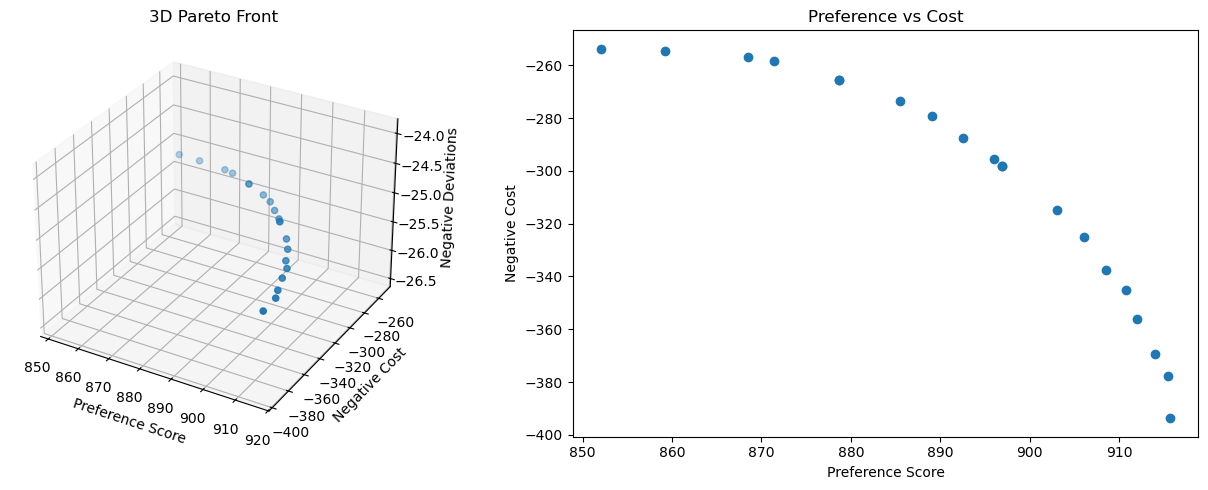

In [ ]:
# [[0.92630075 0.01704684 0.05665241]
#  [0.11773693 0.82246823 0.05979484]
#  [0.88698264 0.10339463 0.00962273]
#  [0.65472901 0.16299098 0.18228002]
#  [0.61875728 0.04000581 0.34123691]
#  [0.95314594 0.03534428 0.01150978]
#  [0.06979732 0.12933663 0.80086605]
#  [0.62612463 0.02907786 0.34479751]
#  [0.81178017 0.11603148 0.07218835]
#  [0.9077241  0.06875708 0.02351882]
#  [0.06144686 0.05300171 0.88555143]
#  [0.77467712 0.0182683  0.20705458]
#  [0.63169261 0.17703924 0.19126815]
#  [0.81396934 0.11422274 0.07180791]
#  [0.62266722 0.03919347 0.33813931]
#  [0.65732151 0.27575178 0.06692672]
#  [0.66351026 0.1121836  0.22430614]
#  [0.71337708 0.10010682 0.1865161 ]
#  [0.77606472 0.1586691  0.06526618]
#  [0.75797669 0.20544203 0.03658128]]
# [[ 915.64285714 -393.72        -25.2       ]
#  [ 852.0952381  -253.78        -25.2       ]
#  [ 903.09126984 -314.65        -25.2       ]
#  [ 885.46031746 -273.59        -25.2       ]
#  [ 908.53968254 -337.55        -25.2       ]
#  [ 913.99206349 -369.51        -25.2       ]
#  [ 859.23809524 -254.56        -25.2       ]
#  [ 912.03174603 -356.17        -25.2       ]
#  [ 895.96428571 -295.37        -25.2       ]
#  [ 906.05555556 -325.1         -25.2       ]
#  [ 868.43650794 -256.87        -25.2       ]
#  [ 915.40079365 -377.75        -25.2       ]
#  [ 878.71428571 -265.62        -25.2       ]
#  [ 896.8968254  -298.12        -25.2       ]
#  [ 910.74206349 -345.1         -25.2       ]
#  [ 871.42063492 -258.47        -25.2       ]
#  [ 892.57936508 -287.46        -25.2       ]
#  [ 896.8968254  -298.12        -25.2       ]
#  [ 889.08333333 -279.09        -25.2       ]
#  [ 878.71428571 -265.62        -25.2       ]]

# Pareto optimal solution：
# solution 1:
#   weight: w_pi=0.926, w_c=0.017, w_D=0.057
#   object:
#     - Preference: 915.6
#     - Cost: 393.7
#     - Deviations: 25.2
# ----------------------------------------
# solution 2:
#   weight: w_pi=0.118, w_c=0.822, w_D=0.060
#   object:
#     - Preference: 852.1
#     - Cost: 253.8
#     - Deviations: 25.2
# ----------------------------------------
# solution 3:
#   weight: w_pi=0.887, w_c=0.103, w_D=0.010
#   object:
#     - Preference: 903.1
#     - Cost: 314.6
#     - Deviations: 25.2
# ----------------------------------------
# solution 4:
#   weight: w_pi=0.655, w_c=0.163, w_D=0.182
#   object:
#     - Preference: 885.5
#     - Cost: 273.6
#     - Deviations: 25.2
# ----------------------------------------
# solution 5:
#   weight: w_pi=0.619, w_c=0.040, w_D=0.341
#   object:
#     - Preference: 908.5
#     - Cost: 337.6
#     - Deviations: 25.2
# ----------------------------------------
# solution 6:
#   weight: w_pi=0.953, w_c=0.035, w_D=0.012
#   object:
#     - Preference: 914.0
#     - Cost: 369.5
#     - Deviations: 25.2
# ----------------------------------------
# solution 7:
#   weight: w_pi=0.070, w_c=0.129, w_D=0.801
#   object:
#     - Preference: 859.2
#     - Cost: 254.6
#     - Deviations: 25.2
# ----------------------------------------
# solution 8:
#   weight: w_pi=0.626, w_c=0.029, w_D=0.345
#   object:
#     - Preference: 912.0
#     - Cost: 356.2
#     - Deviations: 25.2
# ----------------------------------------
# solution 9:
#   weight: w_pi=0.812, w_c=0.116, w_D=0.072
#   object:
#     - Preference: 896.0
#     - Cost: 295.4
#     - Deviations: 25.2
# ----------------------------------------
# solution 10:
#   weight: w_pi=0.908, w_c=0.069, w_D=0.024
#   object:
#     - Preference: 906.1
#     - Cost: 325.1
#     - Deviations: 25.2
# ----------------------------------------
# solution 11:
#   weight: w_pi=0.061, w_c=0.053, w_D=0.886
#   object:
#     - Preference: 868.4
#     - Cost: 256.9
#     - Deviations: 25.2
# ----------------------------------------
# solution 12:
#   weight: w_pi=0.775, w_c=0.018, w_D=0.207
#   object:
#     - Preference: 915.4
#     - Cost: 377.8
#     - Deviations: 25.2
# ----------------------------------------
# solution 13:
#   weight: w_pi=0.632, w_c=0.177, w_D=0.191
#   object:
#     - Preference: 878.7
#     - Cost: 265.6
#     - Deviations: 25.2
# ----------------------------------------
# solution 14:
#   weight: w_pi=0.814, w_c=0.114, w_D=0.072
#   object:
#     - Preference: 896.9
#     - Cost: 298.1
#     - Deviations: 25.2
# ----------------------------------------
# solution 15:
#   weight: w_pi=0.623, w_c=0.039, w_D=0.338
#   object:
#     - Preference: 910.7
#     - Cost: 345.1
#     - Deviations: 25.2
# ----------------------------------------
# solution 16:
#   weight: w_pi=0.657, w_c=0.276, w_D=0.067
#   object:
#     - Preference: 871.4
#     - Cost: 258.5
#     - Deviations: 25.2
# ----------------------------------------
# solution 17:
#   weight: w_pi=0.664, w_c=0.112, w_D=0.224
#   object:
#     - Preference: 892.6
#     - Cost: 287.5
#     - Deviations: 25.2
# ----------------------------------------
# solution 18:
#   weight: w_pi=0.713, w_c=0.100, w_D=0.187
#   object:
#     - Preference: 896.9
#     - Cost: 298.1
#     - Deviations: 25.2
# ----------------------------------------
# solution 19:
#   weight: w_pi=0.776, w_c=0.159, w_D=0.065
#   object:
#     - Preference: 889.1
#     - Cost: 279.1
#     - Deviations: 25.2
# ----------------------------------------
# solution 20:
#   weight: w_pi=0.758, w_c=0.205, w_D=0.037
#   object:
#     - Preference: 878.7
#     - Cost: 265.6
#     - Deviations: 25.2
# ----------------------------------------